# Data Augmentation

# Import Libs


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 Data Augementation for training and testing 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range= 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale= 1.255)

In [7]:
x_train = train_datagen.flow_from_directory('../datasets/animal_dataset/Training',
                                            target_size = (64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)
x_test = test_datagen.flow_from_directory('../datasets/animal_dataset/Testing',
                                            target_size = (64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


# CNN Model Building 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

Adding layers

In [10]:
model = Sequential()


model.add(Convolution2D(32,(3,3), activation= 'relu', input_shape= (64, 64, 3))) # Convulation Layer
model.add(MaxPooling2D(pool_size=(2,2))) #Max Pooling
model.add(Flatten()) #Flatten Layer

model.add(Dense(256, activation= 'relu')) # Hidden layer 1
model.add(Dense(128, activation= 'relu')) # Hidden layer 2

model.add(Dense(4, activation= 'softmax')) # Output layer


In [13]:
#compiling the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= 'accuracy')

In [15]:
#Train the model 
model.fit_generator(x_train, steps_per_epoch= , epochs= 39, validation_data=x_test, validation_steps= len(x_test))

Epoch 1/30
13/13 [==============================] - 3s 265ms/step - loss: 0.5539 - accuracy: 0.7843 - val_loss: 61.5495 - val_accuracy: 0.7761
Epoch 2/30
13/13 [==============================] - 3s 251ms/step - loss: 0.5113 - accuracy: 0.8021 - val_loss: 56.5657 - val_accuracy: 0.8006
Epoch 3/30
13/13 [==============================] - 5s 426ms/step - loss: 0.4616 - accuracy: 0.8376 - val_loss: 63.3020 - val_accuracy: 0.8067
Epoch 4/30
13/13 [==============================] - 9s 735ms/step - loss: 0.4485 - accuracy: 0.8312 - val_loss: 106.6728 - val_accuracy: 0.7209
Epoch 5/30
13/13 [==============================] - 7s 547ms/step - loss: 0.4277 - accuracy: 0.8417 - val_loss: 64.9252 - val_accuracy: 0.8067
Epoch 6/30
13/13 [==============================] - 5s 438ms/step - loss: 0.3925 - accuracy: 0.8554 - val_loss: 32.5270 - val_accuracy: 0.8773
Epoch 7/30
13/13 [==============================] - 5s 407ms/step - loss: 0.3758 - accuracy: 0.8683 - val_loss: 36.0294 - val_accuracy: 0.868

# Save the model 


In [16]:
model.save('animal.h5')

# Test the model 


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

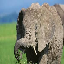

In [22]:
img = image.load_img('../datasets/animal_dataset/Testing/elephants/Z (1).jpeg', target_size= (64,64))
img


In [23]:
x = image.img_to_array(img)

# Dimension expansion

x = np.expand_dims(x, axis=0)
pred = np.argmax(model.predict(x))
op = ['Bears', 'Crows', 'Elephants', 'Rats']
op[pred]

1/1 [==============================] - 0s 15ms/step


'Elephants'